# Overview

Welcome to the CIFAR Classification Challenge for 4ML3 - Machine Learning (Fall 2024)! This competition is part of your course assignment and challenges you to apply machine learning and computer vision techniques to accurately classify images in the CIFAR dataset. The CIFAR dataset includes 60,000 images across multiple categories, representing everyday objects like airplanes, cars, animals, and more.

Your task is to develop a model that can accurately classify each image into its correct category. This challenge not only reinforces concepts from the course but also lets you benchmark your approach against classmates in a competitive setting.

# Goal

Achieve the highest classification accuracy on the CIFAR dataset to excel in this assignment and climb the leaderboard.

# Why Participate?

- Apply Course Knowledge: Use what you've learned in 4ML3 to tackle a real-world dataset.
- Compete with Classmates: Test your model and ranking against peers.
- Build Practical Skills: Gain hands-on experience in computer vision and model optimization.

Ready to showcase your skills? Let’s dive in!

#Dataset Description

The CIFAR-100 dataset is a widely recognized benchmark for image classification tasks. It comprises 60,000 color images with a resolution of 32x32 pixels, evenly distributed across 100 unique classes. These classes cover a broad range of categories, including animals, vehicles, and everyday objects, offering diverse challenges for image recognition models.

For more details and to download the dataset, visit the official CIFAR-100 website. The training set is publicly accessible and available for download for this competition.

Fetch the CIFAR-100 Training Data.

In [40]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define the transformations for the dataset (you can modify this as needed)
transform = transforms.Compose([
    ###### Add your transformations here ########
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download the CIFAR-100 training dataset
train_dataset = datasets.CIFAR100(
    root='./CIFAR_Data',       # Change this path if needed
    train=True,          # Set to True to download the training set
    download=True,       # Set to True to download if not already downloaded
    transform=transform  # Apply transformations
)
##### Hyper-parameters
batch_size = 64 #

# Create a DataLoader for batch processing
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,      # Batch size (you can modify this as needed)
    shuffle=True        # Shuffle data for training
)

# Example: Accessing one batch of images and labels
images, labels = next(iter(train_loader))
print(f"Batch of images shape: {images.shape}")
print(f"Batch of labels: {labels}")


Files already downloaded and verified
Batch of images shape: torch.Size([64, 3, 32, 32])
Batch of labels: tensor([ 7,  0, 78, 85, 15,  6, 60, 86, 98, 15, 98, 68, 92, 64, 14, 40, 97, 82,
        16, 85, 95, 46, 71, 66, 24, 13, 66, 67, 50, 55, 75, 10, 38,  9, 56, 38,
        31, 38, 77, 90, 69, 43, 12,  0, 77, 52, 86, 93, 98, 43, 25, 65, 11, 58,
        52, 76, 73, 68, 15, 83, 71, 79, 12,  5])


# Retrieving Images from `test.csv`

You can use this code to retrieve and display images from the test.csv file, allowing for quick visualization of samples in the test set.

Total samples in CSV: 10000


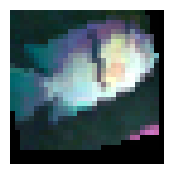

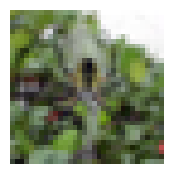

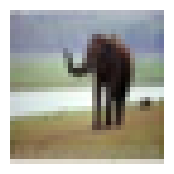

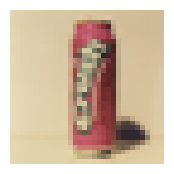

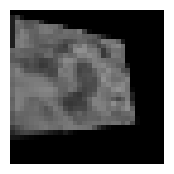

In [41]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

csv_path = './CIFAR_Data/test.csv'
df = pd.read_csv(csv_path)

print(f"Total samples in CSV: {len(df)}")

# Function to reverse the normalization
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

cifar100_mean = (0.5071, 0.4867, 0.4408)
cifar100_std = (0.2675, 0.2565, 0.2761)

# Select a few samples to display (e.g., first 5)
num_samples = 5
samples = df.sample(n=num_samples)  # Randomly select samples for diversity

# Iterate through the selected samples and display images
for index, row in samples.iterrows():
    # Extract pixel data and convert to numpy array
    pixel_data = row[[f'pixel_{i}' for i in range(1, 3073)]].values.astype(np.float32)

    # Reshape to (3, 32, 32)
    image = pixel_data.reshape(3, 32, 32)

    # Convert to torch tensor
    image_tensor = torch.tensor(image)

    # Reverse the normalization
    image_tensor = unnormalize(image_tensor, cifar100_mean, cifar100_std)

    # Clip the values to [0, 1] range
    image_tensor = torch.clamp(image_tensor, 0, 1)

    # Convert to numpy array and transpose to (32, 32, 3) for plotting
    image_np = image_tensor.numpy().transpose(1, 2, 0)

    # Convert to PIL Image for better handling (optional)
    image_pil = Image.fromarray((image_np * 255).astype(np.uint8))

    # Display the image using matplotlib
    plt.figure(figsize=(2,2))
    plt.imshow(image_pil)
    plt.axis('off')


# Submission Guidelines

Follow these steps to prepare and submit your predictions:

1. Train Your Model: Utilize the CIFAR-100 training dataset to develop your image classification model.
2. Predict on Custom Test Set: Apply your trained model to the provided custom test set to generate predictions.
3. Format Your Predictions: Create a CSV file with the following columns:
  - ID: Matches each test image’s unique identifier.
  - LABEL: Your model’s predicted class label (an integer between 0 and 99) for each image.
4. Ensure Correct Format: Verify that your CSV file adheres strictly to the required format to prevent submission errors.
5. Submit for Evaluation: Upload your correctly formatted CSV file for assessment.

Refer to the provided sample_submission.csv to ensure your submission meets the required format specifications.

# Evaluation

The primary evaluation metric for this competition is accuracy. Your model’s accuracy score will be calculated based on the percentage of images correctly classified in the test set.

## Calculation of Accuracy
- Accuracy is calculated as follows:

Accuracy=Number of Correct Predictions / Total Number of Predictions

This score will determine your position on the leaderboard, where higher accuracy corresponds to a better rank. In the case of a tie, Kaggle’s default tie-breaking rules will apply.

Note: Your model should assign each test image to one of the 100 classes in the CIFAR-100 dataset. Ensure your predictions are as accurate as possible to maximize your score.

# Submission File

For each ID in the test set, you must predict the class label for each image. The submission .csv file should contain a header and be in the following format:

In [ ]:
ID,LABEL
1,42
2,7
3,15
4,23
.
.
.


The CIFAR-100 dataset is a collection of 60,000 color images, each of size 32x32 pixels, divided into 100 distinct classes. These images are grouped into 20 superclasses, each containing 5 subcategories. The dataset is split into 50,000 training images and 10,000 test images, with 600 images per class.

Each image is labeled with one of the 100 classes, which cover a variety of objects from animals to vehicles and everyday items. Below is a list of the 100 categories:

## Superclasses and Their Subclasses:
- Aquatic mammals: beaver, dolphin, otter, seal, whale
- Fish: aquarium fish, flatfish, ray, shark, trout
- Flowers: sunflower, tulip, rose, daisy, dandelion
- Food containers: bottle, bowl, can, cup, plate
- Fruit and vegetables: apple, orange, banana, pear, pineapple
- Household electrical devices: clock, computer keyboard, lamp, telephone, television
- Household furniture: bed, chair, couch, table, wardrobe
- Insects: bee, beetle, butterfly, caterpillar, cockroach
- Large carnivores: bear, leopard, lion, tiger, wolf
- Large man-made outdoor things: bridge, castle, house, road, skyscraper
- Large natural outdoor scenes: cloud, forest, mountain, plain, sea
- Large omnivores and herbivores: camel, cattle, chimpanzee, elephant, kangaroo
- Medium-sized mammals: fox, porcupine, possum, raccoon, skunk
- Non-insect invertebrates: crab, lobster, snail, spider, worm
- People: baby, boy, girl, man, woman
Reptiles: crocodile, dinosaur, lizard, snake, turtle
- Small mammals: hamster, mouse, rabbit, shrew, squirrel
- Trees: maple, oak, palm, pine, willow
- Vehicles 1: bicycle, bus, motorcycle, pickup truck, train
- Vehicles 2: lawn mower, rocket, streetcar, tank, tractor

The images in CIFAR-100 are diverse and challenging, making this dataset an ideal testbed for developing and evaluating machine learning models for image classification tasks.

This code snippet creates a DataFrame that maps each CIFAR-100 label (0-99) to its corresponding class name. You can use it to quickly look up class names based on label numbers:

In [42]:
cifar100_label_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]
label_mapping_df = pd.DataFrame({
    'LABEL': range(100),
    'Class Name': cifar100_label_names
})
# Display the first few rows of the DataFrame
print(label_mapping_df.head())


   LABEL     Class Name
0      0          apple
1      1  aquarium_fish
2      2           baby
3      3           bear
4      4         beaver


# Custom Test Set

Please note that our test set differs from the standard CIFAR-100 test set. We have provided a unique custom test set specifically for this competition. Your goal is to train your model using the original CIFAR-100 training data and predict labels for the images in our custom test set.

# Understanding test.csv

The test.csv file contains the data required for making predictions. Here's a breakdown of its structure:

- ID: A unique identifier for each test image, used to align your predictions with the submission.
- Image Data: Pixel values of each image, formatted for model processing.

# Steps to Use test.csv

1. Exclude the ID Column: Remove the ID column before inputting the data into your model, as it is not part of the image features.
2. Preprocess the Data: Apply any necessary preprocessing to match your model’s input requirements.
3. Generate Predictions: Use your trained model to predict labels for the processed test data.

After generating predictions, ensure your submission file (submission.csv) includes both the ID and LABEL columns, formatted according to the guidelines.

-----------------------------------------------------------------------

1. Train You Model:

Utilize the CIFAR-100 training dataset to develop your image classification model.

In [ ]:
# Train the model
'''
Already have: 
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import pandas as pd
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
'''
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CIFAR100_CNN(nn.Module):
    def __init__(self):
        super(CIFAR100_CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create an instance of the model
model = CIFAR100_CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # calculate accuracy
        _, preds = torch.max(outputs, 1)
        corrects += (preds == labels).sum().item() # if the prediction is correct
        total += labels.size(0) # total number of labels

    accuracy = 100 * corrects / total

    
    print(f'Train Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy}%')


Train Epoch 1/20, Loss: 4.110441615209555, Accuracy: 5.844%
Train Epoch 2/20, Loss: 3.577148932935027, Accuracy: 13.806%
Train Epoch 3/20, Loss: 3.227970868120413, Accuracy: 20.274%
Train Epoch 4/20, Loss: 2.986966516355724, Accuracy: 24.778%
Train Epoch 5/20, Loss: 2.797434077848254, Accuracy: 28.622%
Train Epoch 6/20, Loss: 2.6448333338093573, Accuracy: 31.436%
Train Epoch 7/20, Loss: 2.529741207656958, Accuracy: 34.042%
Train Epoch 8/20, Loss: 2.415818886073959, Accuracy: 36.028%
Train Epoch 9/20, Loss: 2.324403001066974, Accuracy: 37.924%
Train Epoch 10/20, Loss: 2.2510025071366058, Accuracy: 39.468%
Train Epoch 11/20, Loss: 2.181852614940585, Accuracy: 40.872%
Train Epoch 12/20, Loss: 2.107633842684119, Accuracy: 42.752%
Train Epoch 13/20, Loss: 2.0430637697124725, Accuracy: 44.03%
Train Epoch 14/20, Loss: 2.0070960590296694, Accuracy: 44.688%
Train Epoch 15/20, Loss: 1.9459495227355177, Accuracy: 46.116%
Train Epoch 16/20, Loss: 1.8987676252794388, Accuracy: 47.196%
Train Epoch 1

2. Predict on Custom Test Set:

Apply your trained model to the provided custom test set to generate predictions.

In [50]:
from torch.utils.data import Dataset
'''
Steps to use test.csv
1. exclude the ID column
2. preprocess the data, such as normalization and reshaping
3. generate predictions, using the trained model to predict labels
4. save the predictions to a CSV file
5. format the CSV file to include the ID column
'''
# remove the ID column
df_data= df.drop(columns=['ID'])

'''
transform= transforms.Compose([
    ###### Add your transformations here ########
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])'''

class PreProcess(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data.iloc[idx].values.astype(np.float32)
        image = image.reshape(3, 32, 32)
        # Convert to PIL Image
        image = Image.fromarray(image.transpose(1, 2, 0).astype(np.uint8)) 
        # image = torch.tensor(image)
        if self.transform:
            image = self.transform(image)
        return image

# Create a DataLoader for batch processing
test_dataset = PreProcess(df_data, transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Generate predictions
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()
predictions = []

with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())

# Save the predictions to a CSV file
output_df = pd.DataFrame({'LABEL': predictions})
# Format the CSV file to include the ID column
output_df.insert(0, 'ID', df['ID'])
output_df.to_csv('predictions.csv', index=False)


3. Format Your Predictions: 

Create a CSV file with the following columns:
  - ID: Matches each test image’s unique identifier.
  - LABEL: Your model’s predicted class label (an integer between 0 and 99) for each image.


4. Ensure Correct Format: 

Verify that your CSV file adheres strictly to the required format to prevent submission errors.


5. Submit for Evaluation: Upload your correctly formatted CSV file for assessment.